# Analysis of Data Analyst Job Offers on Glassdoor

In [296]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
import datetime
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [260]:
df = pd.read_csv('./DataAnalyst.csv', encoding="UTF-8")
df.head(100)

,id,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
5,5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
6,6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),Two Sigma is a different kind of investment ma...,4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,7,Data Science Analyst,$37K-$66K (Glassdoor est.),Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
8,8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1
9,9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),About Us\n\nRiskified is the AI platform power...,4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",-1


Looking at the dataset, some questions arise that could be answered with this data and that could be interesting for job applicants.
    1. Do bigger/older companies offer higher salaries?
	2. Where are the most data analyst jobs offered?
	3. Do Data Analysts typically sit in headquarters?

## Data Understanding

In [261]:
df.describe()

,id,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


In [262]:
# Check values of Revenue column
df["Revenue"].value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [263]:
# Check values of Industry column
df["Industry"].value_counts()

-1                                          353
IT Services                                 325
Staffing & Outsourcing                      323
Health Care Services & Hospitals            151
Computer Hardware & Software                111
Consulting                                  111
Investment Banking & Asset Management        78
Enterprise Software & Network Solutions      69
Internet                                     65
Advertising & Marketing                      51
Banks & Credit Unions                        51
Insurance Carriers                           47
Colleges & Universities                      40
Accounting                                   39
Biotech & Pharmaceuticals                    33
Social Assistance                            23
Aerospace & Defense                          22
Video Games                                  20
Lending                                      15
State & Regional Agencies                    15
Logistics & Supply Chain                

In [264]:
# Check values of Sector column
df["Sector"].value_counts()

Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Mining & Metals                   

In [265]:
# Check values of Size column
df["Size"].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

In [266]:
# Check values of Salary Estimate column
df["Salary Estimate"].value_counts()

$41K-$78K (Glassdoor est.)     57
$42K-$76K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$43K-$76K (Glassdoor est.)     31
$58K-$93K (Glassdoor est.)     31
$60K-$124K (Glassdoor est.)    31
$60K-$110K (Glassdoor est.)    30
$64K-$113K (Glassdoor est.)    30
$97K-$129K (Glassdoor est.)    30
$46K-$87K (Glassdoor est.)     30
$69K-$127K (Glassdoor est.)    30
$46K-$86K (Glassdoor est.)     30
$51K-$87K (Glassdoor est.)     30
$27K-$52K (Glassdoor est.)     30
$51K-$88K (Glassdoor est.)     30
$60K-$66K (Glassdoor est.)     30
$42K-$66K (Glassdoor est.)     30
$35K-$42K (Glassdoor est.)     30
$59K-$85K (Glassdoor est.)     30
$43K-$69K (Glassdoor est.)     30
$30K-$53K (Glassdoor est.)     30
$98K-$114K (Glassdoor est.)    30
$37K-$66K (Glassdoor est.)     30
$37K-$68K (Glassdoor est.)     30
$73K-$82K (Glassdoor est.)     29
$41K-$86K (Glassdoor est.)     29
$26K-$47K (Glassdoor est.)     29
$24K-$48K (Glassdoor est.)     29
$43K-$94K (Gla

## Data Preparation

At first, I will drop columns, that I don't need for my analysis (id, competitors, easy apply, job description, company name).
Most of the columns are categorical variables. The only numeric columns are id, rating and founded. The latter needs to be transformed into company age to be useful for analysis.
Also, some categorical columns need some preparation:
* Add company age column
* Location and headquarters will be split into city and state
* Salary estimate will be transformed to include min, max and mean salary estimate

In [267]:
# drop columns, that I don't need for my analysis 
df.drop(['id', 'Competitors', 'Easy Apply', 'Job Description', 'Company Name'], axis=1, inplace=True)

In [284]:
# Add company age column
now = datetime.datetime.now()
df["Company Age"] = now.year - df["Founded"]

In [268]:
# Location and headquarters will be split into city and state
def splitCityAndState(df, columnNames):
    '''
    Splits input columns of a dataframe with the format <city>, <state> into two columns for city and state
    INPUT:
    df - dataframe to edit
    columnNames - list of columns that should be split
    OUTPUT:
    modified dataframe df
    '''
    for col in columnNames:
        df[[col+'_city',col+'_state']] = df[col].str.split(", ",expand=True,).loc[:,:1]
    return df

In [269]:
loc_columns = ["Location", "Headquarters"]
splitCityAndState(df, loc_columns).drop(loc_columns, axis=1, inplace=True)
df

,Job Title,Salary Estimate,Rating,Size,Founded,Type of ownership,Industry,Sector,Revenue,Location_city,Location_state,Headquarters_city,Headquarters_state
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),New York,NY,New York,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),New York,NY,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,New York,NY,New York,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),New York,NY,McLean,VA
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),New York,NY,New York,NY
5,Data Analyst,$37K-$66K (Glassdoor est.),3.9,1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,New York,NY,Stamford,CT
6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),4.4,1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,New York,NY,New York,NY
7,Data Science Analyst,$37K-$66K (Glassdoor est.),3.7,201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),New York,NY,New York,NY
8,Data Analyst,$37K-$66K (Glassdoor est.),4.0,5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),New York,NY,London,United Kingdom
9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),4.4,501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,New York,NY,New York,NY


In [271]:
# Salary estimate will be transformed to include min, max and mean salary estimate
df[["Min Salary Estimate temp", "Max Salary Estimate temp"]] = df["Salary Estimate"].str.split("-",expand=True,)

# Function to extract the numbers from the string
def clean_salary(salary_estimate): 
    number_search = re.search('(\d+)', salary_estimate)
    if number_search:
        return  number_search.group(1) + "000"
          
# Adjust the estimate columns 
df["Min Salary Estimate String"] = df["Min Salary Estimate temp"].apply(clean_salary)
df["Max Salary Estimate String"] = df["Max Salary Estimate temp"].apply(clean_salary)
df

,Job Title,Salary Estimate,Rating,Size,Founded,Type of ownership,Industry,Sector,Revenue,Location_city,Location_state,Headquarters_city,Headquarters_state,Min Salary Estimate temp,Max Salary Estimate temp,Min Salary Estimate String,Max Salary Estimate String
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),New York,NY,McLean,VA,$37K,$66K (Glassdoor est.),37000,66000
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000
5,Data Analyst,$37K-$66K (Glassdoor est.),3.9,1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,New York,NY,Stamford,CT,$37K,$66K (Glassdoor est.),37000,66000
6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),4.4,1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000
7,Data Science Analyst,$37K-$66K (Glassdoor est.),3.7,201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000
8,Data Analyst,$37K-$66K (Glassdoor est.),4.0,5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),New York,NY,London,United Kingdom,$37K,$66K (Glassdoor est.),37000,66000
9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),4.4,501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000


In [274]:
df["Min Salary Estimate"]= pd.to_numeric(df["Min Salary Estimate String"])
df["Max Salary Estimate"]= pd.to_numeric(df["Max Salary Estimate String"])
df["Mean Salary Estimate"] = df[["Min Salary Estimate", "Max Salary Estimate"]].mean(axis=1)
df

,Job Title,Salary Estimate,Rating,Size,Founded,Type of ownership,Industry,Sector,Revenue,Location_city,Location_state,Headquarters_city,Headquarters_state,Min Salary Estimate temp,Max Salary Estimate temp,Min Salary Estimate String,Max Salary Estimate String,Min Salary Estimate,Max Salary Estimate,Mean Salary Estimate
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),New York,NY,McLean,VA,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0
5,Data Analyst,$37K-$66K (Glassdoor est.),3.9,1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,New York,NY,Stamford,CT,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0
6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),4.4,1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0
7,Data Science Analyst,$37K-$66K (Glassdoor est.),3.7,201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0
8,Data Analyst,$37K-$66K (Glassdoor est.),4.0,5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),New York,NY,London,United Kingdom,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0
9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),4.4,501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,New York,NY,New York,NY,$37K,$66K (Glassdoor est.),37000,66000,37000.0,66000,51500.0


## Modeling
To answer our questions we do several analysis steps:

1. Do bigger/older companies offer higher salaries?

In [280]:
df[["Size", "Mean Salary Estimate"]].groupby(by=["Size"]).mean().sort_values(["Mean Salary Estimate"])

,Mean Salary Estimate
Size,
10000+ employees,69957.333333
201 to 500 employees,71192.771084
501 to 1000 employees,71988.151659
51 to 200 employees,72351.543943
Unknown,72595.238095
1 to 50 employees,72711.815562
1001 to 5000 employees,72869.252874
-1,73469.325153
5001 to 10000 employees,74201.030928


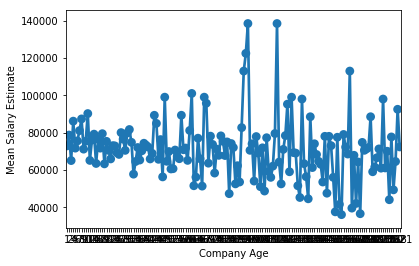

In [290]:
mean = df[["Company Age", "Mean Salary Estimate"]].groupby(by=["Company Age"]).mean().sort_values(["Mean Salary Estimate"])
sns.pointplot(mean.index, mean["Mean Salary Estimate"])

2. Where are the most data analyst jobs offered?

In [298]:
counts = df["Location_state"].value_counts()
counts

CA          626
TX          394
NY          345
IL          164
PA          114
AZ           97
NC           90
CO           88
NJ           86
WA           54
VA           48
OH           35
UT           33
FL           27
IN           23
DE           11
Arapahoe      8
GA            4
KS            3
SC            3
Name: Location_state, dtype: int64

In [299]:
fig = px.choropleth(counts, color="Location_state", locations=counts.index, locationmode="USA-states", 
                    scope="usa", hover_name=counts.index,
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

NameError: name 'px' is not defined

3. Do Data Analysts typically sit in headquarters?